# Long range Ising model

### Submitted by: Anushka and Yashasvee

### Answer 3 : Leap frog Algorithm

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import math

In [2]:
def leapfrog(N_md, p_0, phi_0, J, beta, h, N): 
    product_pi= p_0
    capital_phi = phi_0
    
#     The formulas have been defined as given in the sheet.
    
#    The beginning 
    capital_phi += product_pi/(2*N_md)
    
#    The middle
    for i in range(N_md-1):
        product_pi -= (capital_phi/(beta*J/N)-N*np.tanh(beta*h+capital_phi))/N_md
        capital_phi += product_pi/N_md
        
#     The end
    product_pi -= (capital_phi/(beta*J/N)-N*np.tanh(beta*h+capital_phi))/N_md
    capital_phi += product_pi/(2*N_md)
    
    return (product_pi,capital_phi)


In [3]:
# Using the artificial Hamiltonian

def hamiltonian(p, phi, J, beta, h, N): 
    return p**2/2+phi**2/(2*beta*(J/N))-N*np.log(2*np.cosh(beta*h+phi))

In [4]:
# Defining initial values

p_0 = 0.1
phi_0 = 0.1
J = 0.5       # J should be greater than 0
beta = 1
h = 0.5       # Given
N = 15        # N range is given between 5 to 20

In [5]:
diff = []
range_1 = range(1,100)

for N_md in range_1:
    arr = leapfrog(N_md, p_0, phi_0, J, beta, h, N)
    p_f = arr[0]          # We need final values of p_f and phi_f to calculate H_f
    phi_f = arr[1]
    H_f = hamiltonian(p_f, phi_f, J, beta, h, N)
    H_0 = hamiltonian(p_0, phi_0, J, beta, h, N)
    
#     The following is the quantity we want on y-axis
    diff.append(abs((H_f-H_0)/H_0)) 


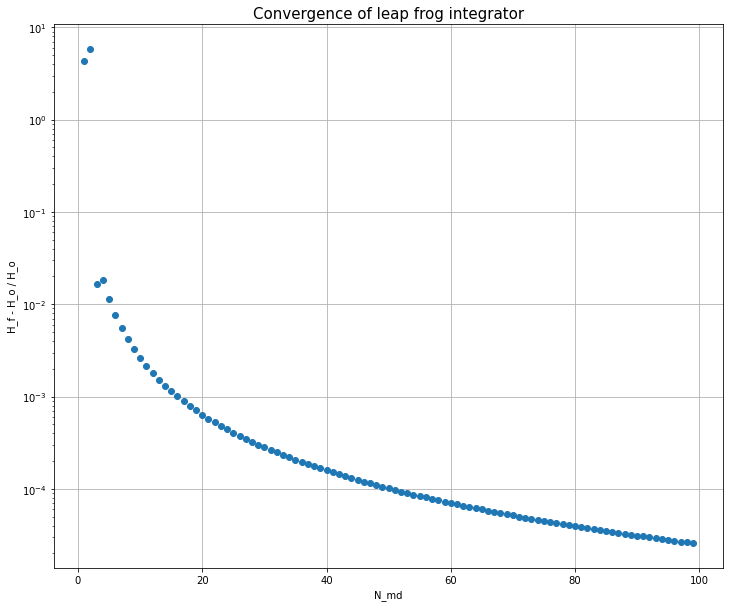

In [6]:
plt.figure(figsize=(12,10))
plt.yscale('log')
plt.grid()
plt.xlabel("N_md")
plt.ylabel("H_f - H_o / H_o")
plt.title("Convergence of leap frog integrator", fontsize =15)
plt.plot(range_1, diff,'o')

### Answer 4 : HMC Algorithm

In [7]:
# Now we code the HMC algorithm

# Understanding: We sample from N space and integrate the EOM's using leapfrog to get p' and phi'
# Then we accept the value of phi' with the Metropolis accept/reject (with the given prob.) and repeat the process
# To keep in mind: We store every value of phi regardless to generate our Markov chain. If the algorithm rejcts phi' we
# store phi

# So we need to accept and reject according to the probability distribution given in the sheet which is basically exp(H)

# Size of ensemble is given as N_cfg

def markov_chain(phi_i,N_cfg,N_md,beta,J,h,N):
    chain = []
    chain.append(phi_i)
    for i in range(N_cfg):
        p = np.random.normal(0,1)  # Random sample
        new = leapfrog(N_md, p, chain[-1], J, beta, h, N) # Integrating leapfrog algorithm
        prob = np.exp(hamiltonian(p,chain[-1], J, beta, h, N)-hamiltonian(new[0], new[1], J, beta, h, N))
#  Given probability distribution function defined above
        if prob > np.random.uniform(0,1):   # Accept/reject
            chain.append(new[1])  
        else:                           
            chain.append(chain[-1]) 
    return chain


In [8]:
#  Now we need to define observables(m and E), that will be similar to the one done in Homework 2

def variables(phi_i, N_cfg, N_md, J, beta, h, N, obs):
    chain = markov_chain(phi_i,N_cfg,N_md,beta,J,h,N)
#     From Part 1 we have the equations foe <m> and E so we use them here:
    m = 0.0
    E = 0.0
    for i in range(len(chain)):
        m+= np.tanh(beta*h + chain[i])
        E+= -((chain[i]**2)/(2*(J/N)*(beta**2))+(N*h*np.tanh(beta*h + chain[i])))/N
    m = m/N_cfg
    E = E/N_cfg
    if obs == "m":
        var = m
    if obs == "E":
        var = E
        
    return var


### Answer 5 : Average energy per site, $\epsilon$, as a function of J

In [17]:
# We have to also plot the th. functions (the last 3 equations in the sheet), therefore, we define them as follows:

# import math
# T=1
# def func(j,x):
#     return(np.exp(0.5*j*x**2/T + h*x/T))

# # The math.comb() method returns the number of ways picking k unordered outcomes from n possibilities, 
# # without repetition, also known as combinations.

# def z_17(J,beta,h,N):
#     for n in range(N):
#         z+=math.comb(N,n)*func(J/N,N-2*n)
#     return z

# def E_18(J, beta, h, N):
#     Energy = 0.0
#     for n in range(N):
#         Energy += math.comb(N, n) * (0.5*beta*J/N*(N-2*n)**2+beta*h*(N-2*n)) *func(J,N-2*n)
#     return Energy
    
    




#### Doubt: 
When I uncomment the code for analytic equations, even my computational graphs change, I do not understand what is happening here. Also, the theoretical curves are not coming out to be right.


Text(0.5, 1.0, 'E as a f(J) for N = 5')

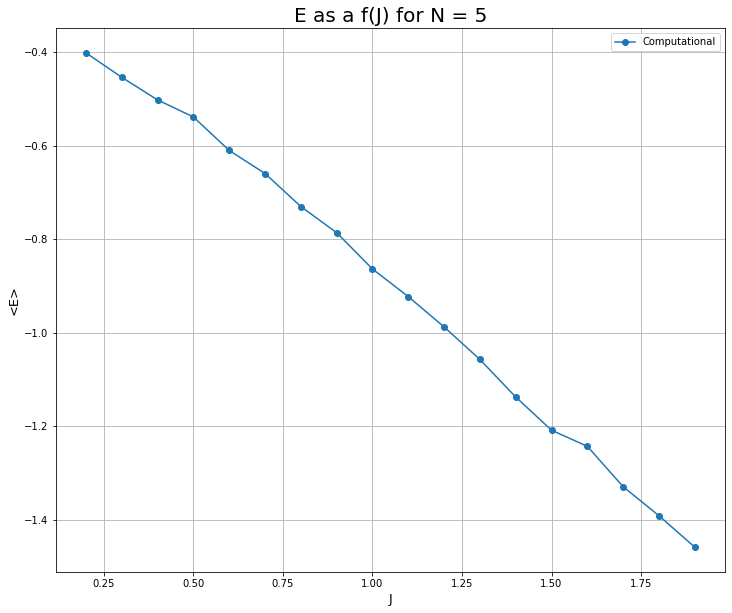

In [18]:
# Average energy per site for different values of N

h = 0.5
# Given, beta*h = h so beta =1
beta = 1
N_md = 25
N_cfg = 4000
range_2 = np.arange(0.2,2,0.1) # Given
phi_random = np.random.normal(0,1)

energy_5 = [variables(phi_random, N_cfg, N_md, J, beta, h, 5, "E") for J in range_2]
# e_18_5 = [E_18(J,beta,h,5) for J in range_2]
plt.figure(figsize = (12,10))
plt.plot(range_2, energy_5, 'o-',label="Computational")
# plt.plot(range_2, e_18_5, 'o-',label="Theoretical")
plt.grid()
plt.xlabel("J", fontsize = 13)
plt.ylabel("<E>", fontsize = 13)
plt.legend()
plt.title("E as a f(J) for N = 5", fontsize = 20 )

Text(0.5, 1.0, 'E as a f(J) for N = 10')

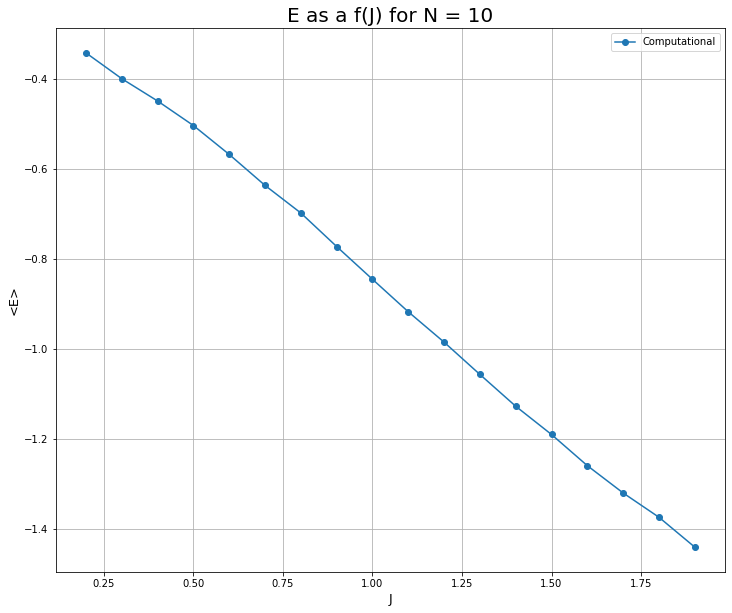

In [19]:
energy_10 = [variables(phi_random, N_cfg, N_md, J, beta, h, 10, "E") for J in range_2]
plt.figure(figsize = (12,10))
plt.plot(range_2, energy_10, 'o-',label="Computational")
plt.grid()
plt.xlabel("J", fontsize = 13)
plt.ylabel("<E>", fontsize = 13)
plt.legend()
plt.title("E as a f(J) for N = 10", fontsize = 20 )

Text(0.5, 1.0, 'E as a f(J) for N = 15')

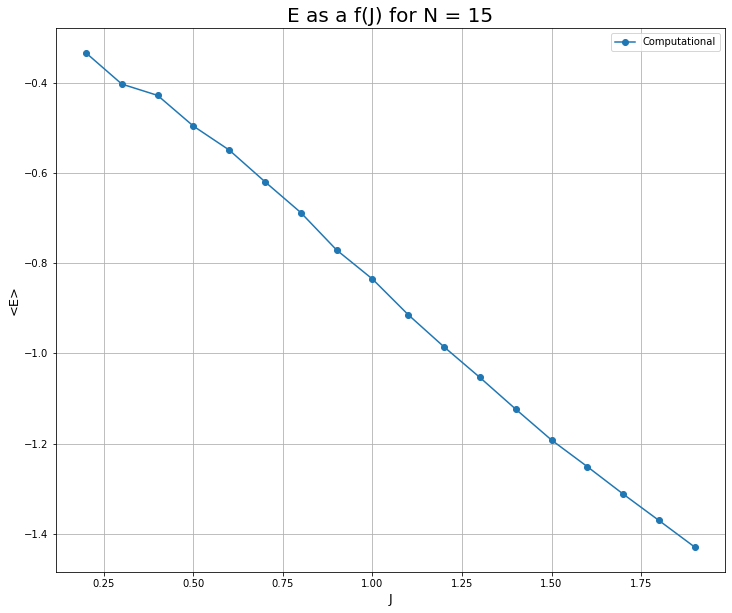

In [20]:
energy_15 = [variables(phi_random, N_cfg, N_md, J, beta, h, 15, "E") for J in range_2]
plt.figure(figsize = (12,10))
plt.plot(range_2, energy_15, 'o-',label="Computational")
plt.grid()
plt.xlabel("J", fontsize = 13)
plt.ylabel("<E>", fontsize = 13)
plt.legend()
plt.title("E as a f(J) for N = 15", fontsize = 20 )

Text(0.5, 1.0, 'E as a f(J) for N = 20')

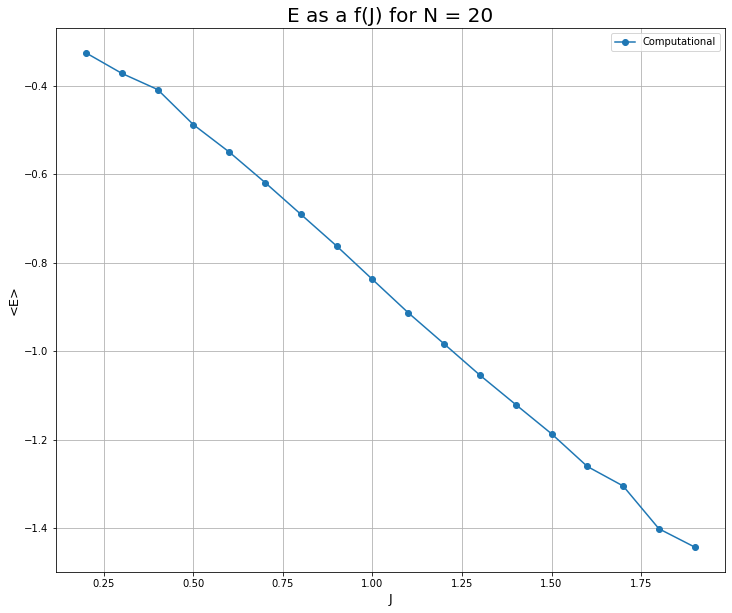

In [21]:
energy_20 = [variables(phi_random, N_cfg, N_md, J, beta, h, 20, "E") for J in range_2]
plt.figure(figsize = (12,10))
plt.plot(range_2, energy_20, 'o-', label="Computational")

plt.grid()
plt.xlabel("J", fontsize = 13)
plt.ylabel("<E>", fontsize = 13)
plt.legend()
plt.title("E as a f(J) for N = 20", fontsize = 20 )

Text(0.5, 1.0, 'E as a f(J) for several N')

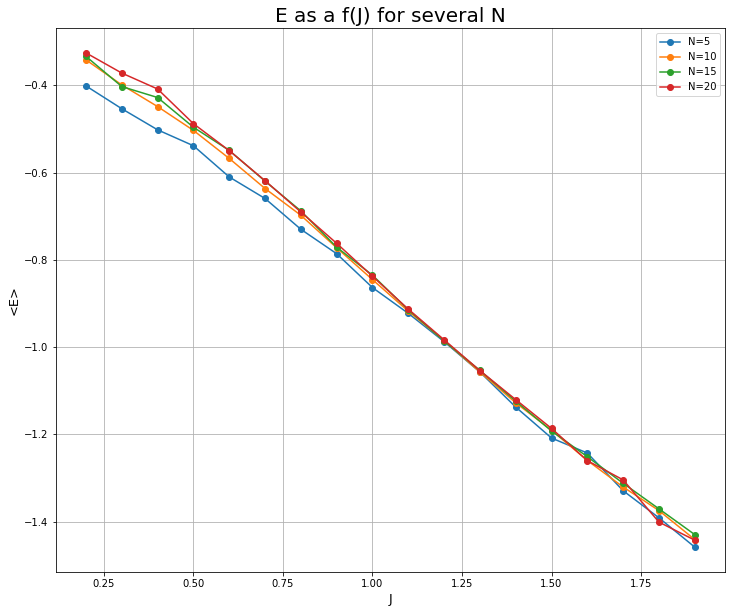

In [22]:
plt.figure(figsize=(12,10))
plt.grid()
plt.plot(range_2, energy_5, 'o-', label = "N=5")
plt.plot(range_2, energy_10, 'o-',label = "N=10")
plt.plot(range_2, energy_15, 'o-',label = "N=15")
plt.plot(range_2, energy_20, 'o-',label = "N=20")
plt.xlabel("J", fontsize = 13)
plt.ylabel("<E>", fontsize = 13)
plt.legend()
plt.title("E as a f(J) for several N", fontsize = 20 )

### Answer 5 : Magnetization, $<m>$ , as a function of J

In [23]:
m_5 =  [variables(phi_random, N_cfg, N_md, J, beta, h, 5, "m") for J in range_2]
m_10 = [variables(phi_random, N_cfg, N_md, J, beta, h, 10, "m") for J in range_2]
m_15 = [variables(phi_random, N_cfg, N_md, J, beta, h, 15, "m") for J in range_2]
m_20 = [variables(phi_random, N_cfg, N_md, J, beta, h, 20, "m") for J in range_2]

Text(0.5, 1.0, '<m> as a f(J) for several N')

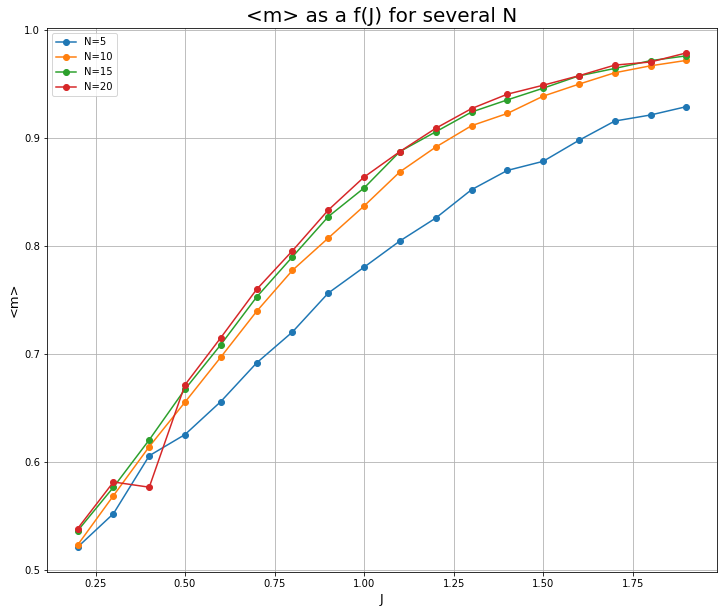

In [24]:
plt.figure(figsize=(12,10))
plt.grid()
plt.plot(range_2, m_5, 'o-', label = "N=5")
plt.plot(range_2, m_10, 'o-',label = "N=10")
plt.plot(range_2, m_15, 'o-',label = "N=15")
plt.plot(range_2, m_20, 'o-',label = "N=20")
plt.xlabel("J", fontsize = 13)
plt.ylabel("<m>", fontsize = 13)
plt.legend()
plt.title("<m> as a f(J) for several N", fontsize = 20 )